# Added 100% of duplicates 

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import duplicates_utils
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_original = df.copy()
df_original.dropna(axis=0,inplace=True)
df_original = df_original[df_original['age'] >= 0]


df.dropna(axis=0, inplace=True)
df = df[df['age'] >= 0]

duplicates_utils.drop_negative_age(df)

## Adding duplicates

In [2]:
print('--------------------------------------')
duplicates_utils.print_duplicates_values(df) 

print(f'\nADDING 100% TO FEATURE \n')

df = duplicates_utils.duplicates_values(df, 100)
duplicates_utils.print_duplicates_values(df)

--------------------------------------
Number of rows:  9984
Duplicate Counts:  0
Percentage of Duplicate Values:  0.0

ADDING 100% TO FEATURE 

Number of rows:  19968
Duplicate Counts:  9984
Percentage of Duplicate Values:  50.0


## Decision Tree

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7034
           1       0.99      1.00      0.99      6943

    accuracy                           0.99     13977
   macro avg       0.99      0.99      0.99     13977
weighted avg       0.99      0.99      0.99     13977

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2985
           1       0.98      0.99      0.99      3006

    accuracy                           0.99      5991
   macro avg       0.99      0.99      0.99      5991
weighted avg       0.99      0.99      0.99      5991

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4999
           1       0.99      0.99      0.99      4985

    accuracy                           0.99      9984


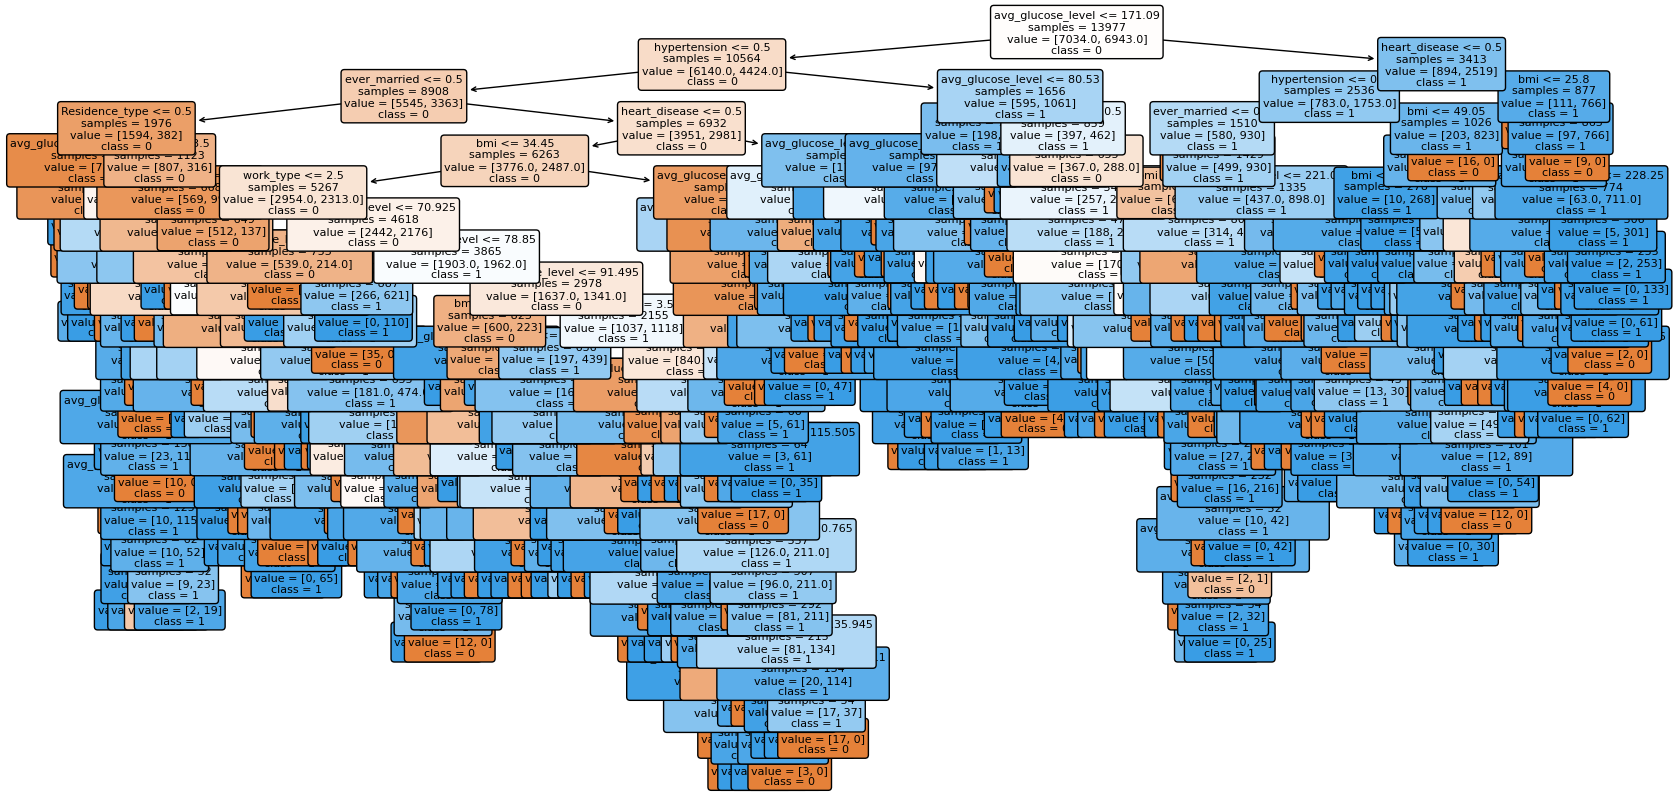

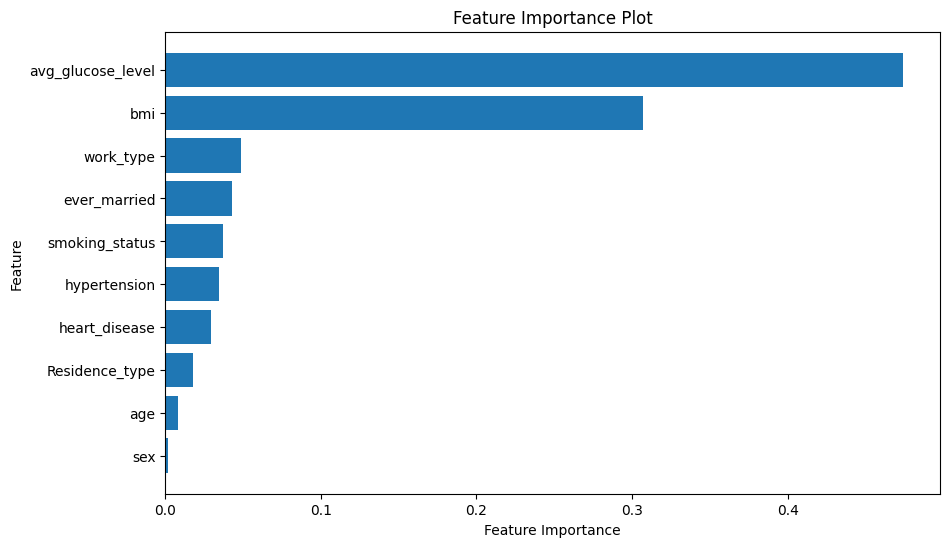

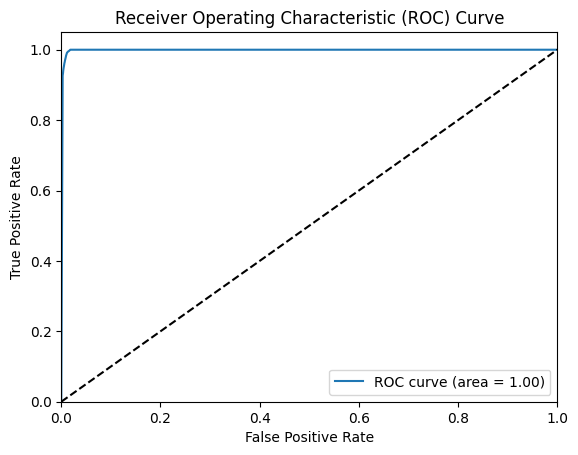

AUC Score: 0.9981600532744462


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9849785407725322, 0.9914163090128756, 0.9785407725321889, 0.9828326180257511, 0.9892703862660944, 0.9871244635193133, 0.9871244635193133, 0.9871152469577666, 0.9964209019327129, 0.9849677881173944]
Mean accuracy: 0.9869791490655941
95% confidence interval: (0.9835187671391883, 0.990439530992)


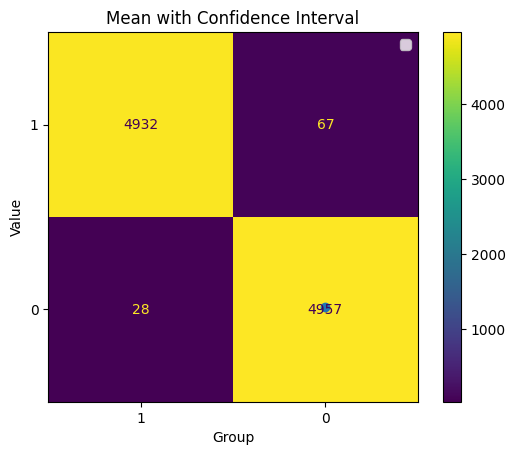

In [3]:
decision_tree = ML_algorithms.train_decision_tree_model(df, df_original)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df)


## Hist Gradient Boosting Classifier

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 57.33439350128174
Best parameters found:  {'l2_regularization': 0.3, 'learning_rate': 0.2, 'max_depth': 6, 'max_iter': 332, 'min_samples_leaf': 4}
Best score on training data:  1.0
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7034
           1       1.00      1.00      1.00      6943

    accuracy                           1.00     13977
   macro avg       1.00      1.00      1.00     13977
weighted avg       1.00      1.00      1.00     13977

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2985
           1       0.99      1.00      1.00      3006

    accuracy                           1.00      5991
   macro avg       1.00      1.00      1.00      5991
weighted avg       1.00      1.00      1.00      5991



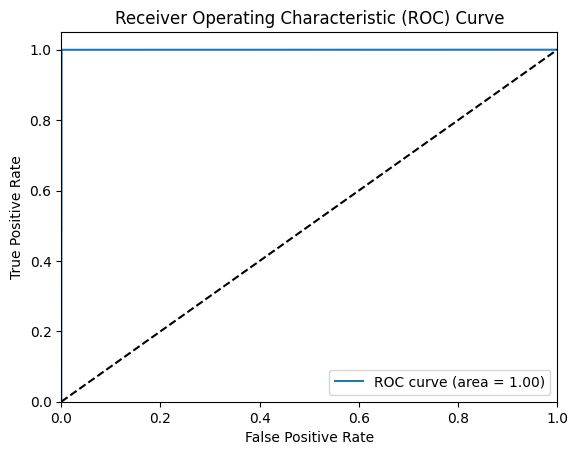

AUC Score: 0.9997430980679586


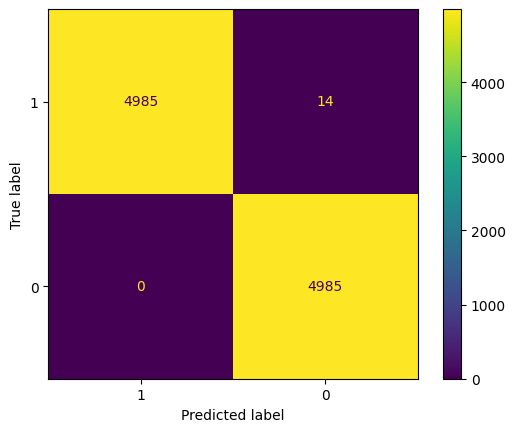

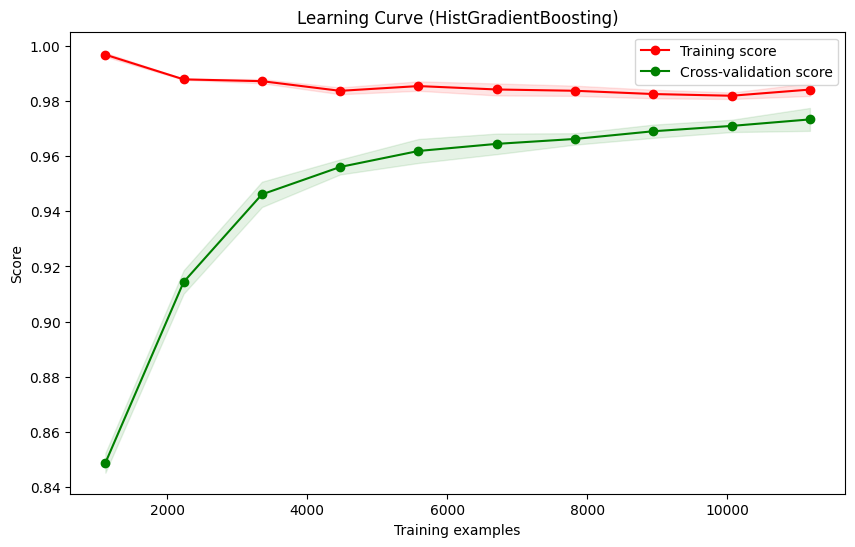

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9985693848354793, 0.9957081545064378, 0.9992846924177397, 0.9992846924177397, 0.9957081545064378, 0.9971387696709585, 0.9985693848354793, 0.9985683607730852, 0.9971367215461704, 0.9971367215461704]
Mean accuracy: 0.9977105037055697
95% confidence interval: (0.996751594851383, 0.9986694125597564)


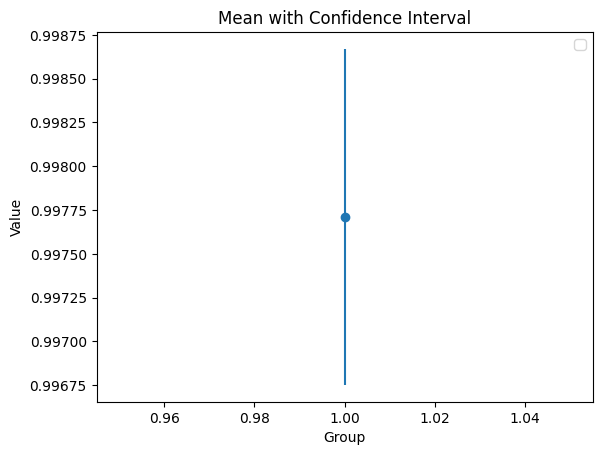

--------------------------------------


In [4]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df, df_original)
ML_algorithms.k_fold_cross_validation_dt(hgb,df)

print('--------------------------------------')